In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq3
%matplotlib inline

In [2]:
def run_query(q):
    with sq3.connect("chinook.db") as conn:
        return pd.read_sql(q, conn)

In [3]:
def run_command(c):
    with sq3.connect("chinook.db"):
        conn.isolation_level = None
        conn.execute(c)

In [4]:
def show_tables():
    q="SELECT name,type FROM sqlite_master WHERE type IN ('table','view');"
    return run_query(q)

In [5]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


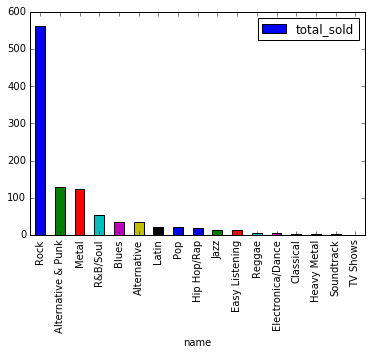

In [6]:
q1="SELECT g.name,i.billing_country, SUM(il.quantity) total_sold, CAST(SUM(il.quantity)*100 AS FLOAT)/(SELECT SUM(il.quantity) FROM invoice_line il INNER JOIN invoice i ON i.invoice_id = il.invoice_id WHERE i.billing_country = 'USA' ) percent_sold FROM track t INNER JOIN invoice_line il ON il.track_id = t.track_id INNER JOIN genre g ON g.genre_id = t.genre_id INNER JOIN invoice i ON i.invoice_id = il.invoice_id WHERE i.billing_country = 'USA' GROUP BY g.name ORDER BY total_sold DESC "
run_query(q1)
usa_sold = run_query(q1)
#q1="(SELECT SUM(il.quantity) FROM invoice_line il INNER JOIN invoice i ON i.invoice_id = il.invoice_id WHERE i.billing_country = 'USA' )"
#run_query(q1)
usa_sold.plot.bar("name", "total_sold")

Rock, ALternative & Punk, Metal genres are best sold in USA based on practice chinook dataset

In [7]:
q2="SELECT e.employee_id, SUM(i.total) total_sales FROM employee e LEFT JOIN customer c ON c.support_rep_id = e.employee_id INNER JOIN invoice i ON i.customer_id = c.customer_id GROUP BY e.employee_id"
run_query(q2)

,employee_id,total_sales
0,3,1731.51
1,4,1584.00
2,5,1393.92


In [15]:
q3="""
SELECT c.country, COUNT(DISTINCT(c.customer_id)) num_of_cust, SUM(i.total) tot_sales,SUM(i.total)/COUNT(DISTINCT(c.customer_id)) av_sale_cust, SUM(i.total)/COUNT(i.invoice_id) av_order_val  
From customer c 
LEFT JOIN invoice i ON i.customer_id = c.customer_id 
GROUP BY c.country
""""
run_query(q3)

SyntaxError: EOL while scanning string literal (<ipython-input-15-766c7e94b10e>, line 6)